## Pycaret
Having heard a lot about how Pycaret automates the modelling, I'd like to explore how it works. 

In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Read the data to build model.
df = pd.read_csv('../datasets/df_pycaret.csv').drop(['Unnamed: 0'],axis=1)
print(df.shape)
df.head()

(81135, 2)


,text,emotion
0,That game hurt .,sadness
1,"You right , care fuck ' em !",neutral
2,"[ NAME ] nowhere near , Falcon .",neutral
3,"I , mention , I think that's triggered nostalg...",neutral
4,BUT IT'S HER TURN ! /,neutral


In [3]:
# Ensure that the anaconda environment has the spacy en package. This is for pycaret to do cleaning
import spacy
nlp = spacy.load('en_core_web_sm')

In [4]:
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
from nltk.corpus import stopwords

In [6]:
stopwords = stopwords.words("english")

In [7]:
stopwords.append(STOP_WORDS)

In [8]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [9]:
from pycaret.nlp import *
%time
su_1 = setup(data=df, target='text',custom_stopwords=stopwords, session_id=21)

Description,Value
session_id,21
Documents,81135
Vocab Size,15448
Custom Stopwords,True


In [10]:
%time
m1 = create_model(model='lda', multi_core=True, num_topics=7)

In [11]:
%time
lda_data = assign_model(m1)

In [12]:
# df to predict
lda_data.head()

,text,emotion,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Dominant_Topic,Perc_Dominant_Topic
0,,sadness,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,Topic 0,0.14
1,right care fuck,neutral,0.342443,0.035845,0.035785,0.035715,0.478672,0.035824,0.035715,Topic 4,0.48
2,,neutral,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,Topic 0,0.14
3,think trigger,neutral,0.047783,0.047876,0.047623,0.047623,0.713212,0.048261,0.047623,Topic 4,0.71
4,turn,neutral,0.571150,0.071431,0.071431,0.071615,0.071512,0.071431,0.071431,Topic 0,0.57


In [13]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [13]:
# topic modelling. 
lda_data.drop(['text','Dominant_Topic','Perc_Dominant_Topic'], axis=1, inplace=True)
lda_data.head()

,emotion,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,sadness,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
1,neutral,0.342443,0.035845,0.035785,0.035715,0.478672,0.035824,0.035715
2,neutral,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
3,neutral,0.047783,0.047876,0.047623,0.047623,0.713212,0.048261,0.047623
4,neutral,0.571150,0.071431,0.071431,0.071615,0.071512,0.071431,0.071431


In [15]:
from pycaret.classification import *

In [16]:
from imblearn.under_sampling import RandomUnderSampler

**Allowing Pycaret to fix_imbalance=True using default SMOTE**

In [17]:
%time
pce_1 = setup(data = lda_data, target = 'emotion', session_id = 5, train_size = 0.8, fix_imbalance=True)

,Description,Value
0,session_id,5
1,Target,emotion
2,Target Type,Multiclass
3,Label Encoded,"anger: 0, disgust: 1, fear: 2, joy: 3, neutral: 4, sadness: 5, surprise: 6"
4,Original Data,"(81135, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5720,0.6833,0.3726,0.6135,0.5887,0.2463,0.2493,50.7830
et,Extra Trees Classifier,0.5680,0.6863,0.3746,0.6148,0.5866,0.2474,0.2509,9.5440
dt,Decision Tree Classifier,0.5394,0.6445,0.3678,0.6096,0.5659,0.2302,0.2361,3.6370
lightgbm,Light Gradient Boosting Machine,0.4128,0.5512,0.2228,0.5073,0.4500,0.0557,0.0578,3.9290
knn,K Neighbors Classifier,0.3738,0.6330,0.3365,0.5775,0.4241,0.1389,0.1565,2.2290
gbc,Gradient Boosting Classifier,0.3498,0.5239,0.1857,0.4853,0.3990,0.0194,0.0207,214.4430
ada,Ada Boost Classifier,0.1662,0.5252,0.1870,0.4886,0.2023,0.0187,0.0242,15.9670
dummy,Dummy Classifier,0.0974,0.5000,0.1429,0.0095,0.0173,0.0000,0.0000,0.1170
lda,Linear Discriminant Analysis,0.0939,0.5350,0.1869,0.4771,0.0833,0.0177,0.0250,0.8030
lr,Logistic Regression,0.0922,0.5349,0.1881,0.4824,0.0811,0.0174,0.0246,3.7470


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [19]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6061,0.6931,0.3776,0.6243,0.6145,0.2745,0.2751
1,0.6036,0.6836,0.3825,0.6201,0.6112,0.2678,0.2683
2,0.5988,0.6834,0.3636,0.6152,0.6064,0.2571,0.2575
3,0.5546,0.6787,0.3711,0.6115,0.5767,0.2374,0.2421
4,0.5588,0.6833,0.3753,0.6126,0.5802,0.2397,0.2439
5,0.5560,0.6813,0.3657,0.6089,0.5769,0.2335,0.2374
6,0.5583,0.6784,0.3647,0.6055,0.5772,0.2313,0.2347
7,0.5605,0.6888,0.3759,0.6155,0.5821,0.2442,0.2486
8,0.5624,0.6809,0.3793,0.6116,0.5819,0.2399,0.2437


In [20]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0625,0.5000,0.1429,0.0039,0.0074,0.0000,0.0000
1,0.0428,0.5000,0.1429,0.0018,0.0035,0.0000,0.0000
2,0.0470,0.5000,0.1429,0.0022,0.0042,0.0000,0.0000
3,0.6779,0.5000,0.1429,0.4595,0.5477,0.0000,0.0000
4,0.0470,0.5000,0.1429,0.0022,0.0042,0.0000,0.0000
5,0.6779,0.5000,0.1429,0.4595,0.5477,0.0000,0.0000
6,0.0975,0.5000,0.1429,0.0095,0.0173,0.0000,0.0000
7,0.0627,0.5000,0.1429,0.0039,0.0074,0.0000,0.0000
8,0.0308,0.5000,0.1429,0.0009,0.0018,0.0000,0.0000


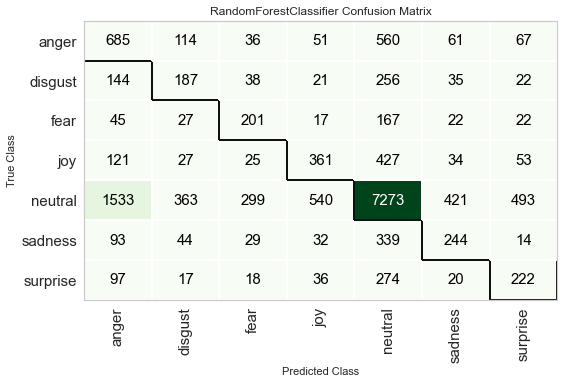

In [21]:
plot_model(rf, plot = 'confusion_matrix')

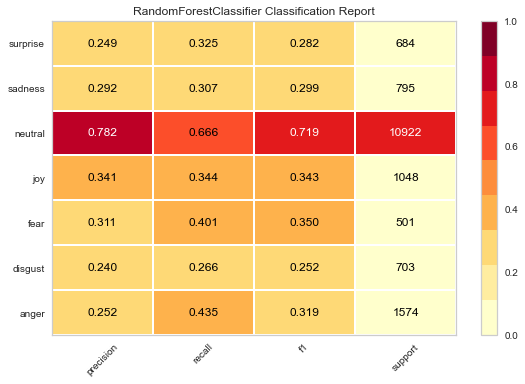

In [22]:
plot_model(rf, plot = 'class_report')

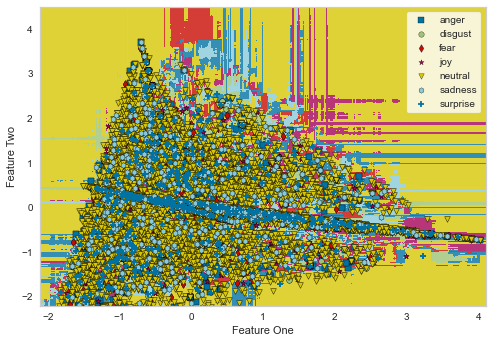

In [23]:
plot_model(rf, plot='boundary')

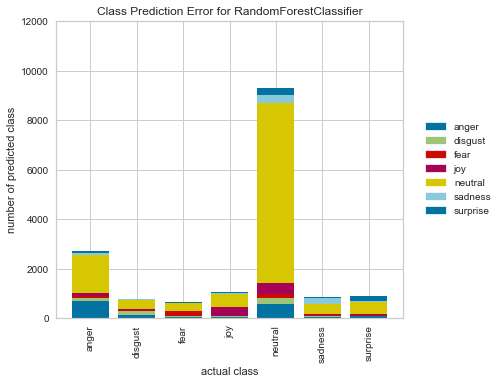

In [24]:
plot_model(rf, plot = 'error')

In [25]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5653,0.6972,0.3920,0.6179,0.5856,0.2579,0.2624


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,emotion,Label,Score
0,0.283378,0.129500,0.253010,0.191189,0.014319,0.014293,0.114312,disgust,disgust,1.0000
1,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,neutral,anger,0.1915
2,0.023811,0.023811,0.023851,0.357136,0.023879,0.023834,0.523678,sadness,neutral,0.6900
3,0.166806,0.178347,0.450932,0.017904,0.017899,0.150100,0.018012,joy,joy,0.6300
4,0.035743,0.035743,0.035743,0.785540,0.035743,0.035743,0.035743,neutral,neutral,0.8700
...,...,...,...,...,...,...,...,...,...,...
16222,0.380707,0.047640,0.047640,0.047640,0.047640,0.381094,0.047640,anger,anger,0.3600
16223,0.035753,0.340025,0.035761,0.035725,0.035741,0.035725,0.481271,neutral,neutral,0.9100
16224,0.517523,0.015993,0.015929,0.402841,0.015891,0.015937,0.015886,sadness,neutral,0.9200
16225,0.028660,0.228758,0.028641,0.028597,0.273224,0.228363,0.183757,disgust,neutral,0.6720


In [27]:
final_et = finalize_model(rf)

**Specifying fix_imbalance_method using RandomUnderSampler**

In [ ]:
%time
pce_1 = setup(data = lda_data, target = 'emotion', session_id = 5, train_size = 0.8, fix_imbalance=True, fix_imbalance_method = RandomUnderSampler())

,Description,Value
0,session_id,5
1,Target,emotion
2,Target Type,Multiclass
3,Label Encoded,"anger: 0, disgust: 1, fear: 2, joy: 3, neutral: 4, sadness: 5, surprise: 6"
4,Original Data,"(81135, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Giving a summary of the models' performances. 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.2433,0.6086,0.3138,0.5510,0.2793,0.0846,0.1050,0.8860
dt,Decision Tree Classifier,0.2336,0.5517,0.3072,0.5498,0.2679,0.0801,0.1002,0.1040
rf,Random Forest Classifier,0.2314,0.5950,0.3147,0.5495,0.2625,0.0818,0.1026,1.5130
lightgbm,Light Gradient Boosting Machine,0.2148,0.5689,0.2620,0.5351,0.2553,0.0590,0.0739,0.8650
svm,SVM - Linear Kernel,0.2106,0.0000,0.1525,0.3301,0.2243,0.0043,0.0053,0.0890
gbc,Gradient Boosting Classifier,0.1777,0.5556,0.2110,0.5287,0.2182,0.0359,0.0460,9.2050
lr,Logistic Regression,0.1683,0.5394,0.1761,0.5086,0.2110,0.0197,0.0252,1.4360
knn,K Neighbors Classifier,0.1645,0.5437,0.2209,0.5185,0.1892,0.0359,0.0470,0.2470
lda,Linear Discriminant Analysis,0.1645,0.5382,0.1748,0.5110,0.2051,0.0194,0.0249,0.0570
ada,Ada Boost Classifier,0.1567,0.5379,0.1754,0.5061,0.1962,0.0179,0.0230,0.4540


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5, verbose=0,
                     warm_start=False)

In [ ]:
# Have a look at how the best model's metrics are. 
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2584,0.6138,0.3202,0.5475,0.2975,0.0908,0.1112
1,0.2254,0.6113,0.3209,0.5519,0.2507,0.0839,0.1066
2,0.2083,0.6069,0.2972,0.5417,0.2338,0.0705,0.0901
3,0.2602,0.6058,0.3079,0.5551,0.3042,0.0876,0.1069
4,0.2217,0.6053,0.3198,0.5526,0.2471,0.0819,0.1043
5,0.2222,0.5994,0.3029,0.5394,0.2526,0.0738,0.0931
6,0.2094,0.5997,0.3037,0.5381,0.2328,0.0720,0.0922
7,0.2634,0.6077,0.3119,0.5528,0.3078,0.0893,0.1086
8,0.2159,0.6197,0.3277,0.5626,0.2400,0.0848,0.1090


In [ ]:
# Pycaret also helps to auto tune the model selected.
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2051,0.5545,0.2014,0.5108,0.2599,0.0313,0.0389
1,0.1517,0.5518,0.2028,0.5348,0.1872,0.0309,0.0410
2,0.1530,0.5525,0.1947,0.5158,0.1902,0.0246,0.0323
3,0.2430,0.5452,0.1914,0.5190,0.3073,0.0350,0.0420
4,0.1570,0.5435,0.2051,0.5090,0.1905,0.0263,0.0345
5,0.1299,0.5449,0.1848,0.5056,0.1584,0.0188,0.0253
6,0.1624,0.5611,0.2030,0.5272,0.2006,0.0302,0.0395
7,0.2145,0.5456,0.1964,0.5108,0.2726,0.0301,0.0371
8,0.2092,0.5594,0.2015,0.5183,0.2651,0.0336,0.0417


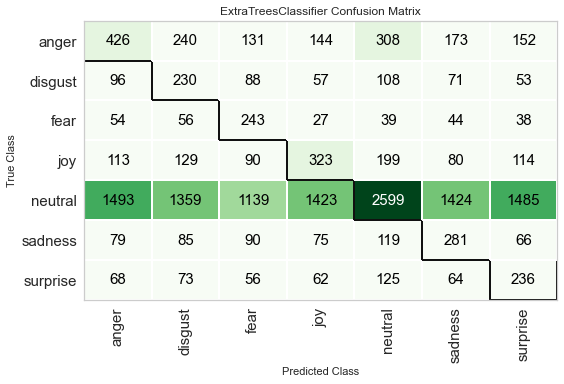

In [ ]:
plot_model(et, plot = 'confusion_matrix')

Compared to the SVC model's confusion matrix, this is an improvement because the number wrongly predicted as 'neutral' is now less than the true positives for each emotion class. 

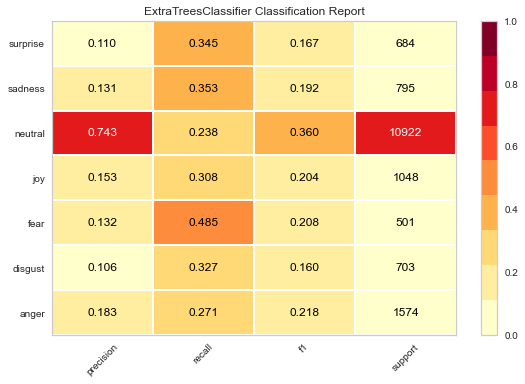

In [ ]:
plot_model(et, plot = 'class_report')

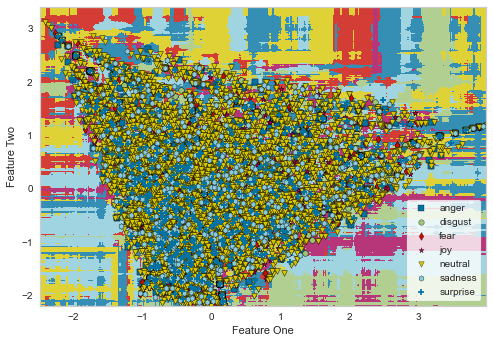

In [ ]:
plot_model(et, plot='boundary')

From this plot I can see that my data is very closely intertwined, hence the classification will unlikely be ideal.

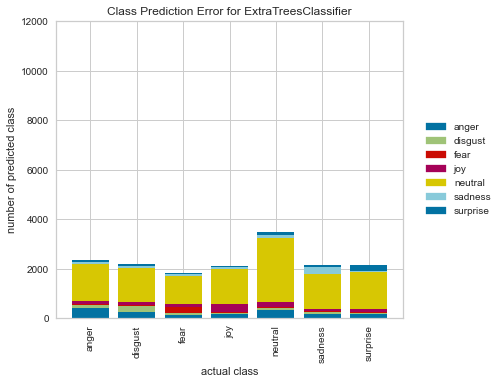

In [24]:
plot_model(et, plot = 'error')

Many are wrongly classified as neutral. Not surprising since neutral started off as almost 70% of the data. 

In [25]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.2673,0.6196,0.3325,0.5476,0.3068,0.0969,0.1175


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,emotion,Label,Score
0,0.146773,0.134388,0.361681,0.014317,0.014297,0.014290,0.314254,disgust,disgust,1.0000
1,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,neutral,neutral,0.1871
2,0.023811,0.023811,0.023828,0.357093,0.023835,0.023841,0.523782,sadness,sadness,0.9500
3,0.017860,0.184776,0.725679,0.017902,0.017901,0.017968,0.017915,joy,joy,0.3800
4,0.035742,0.035742,0.035742,0.785550,0.035742,0.035742,0.035742,neutral,surprise,0.5500
...,...,...,...,...,...,...,...,...,...,...
16222,0.380719,0.047639,0.047639,0.047639,0.047639,0.381088,0.047639,anger,disgust,0.6600
16223,0.035746,0.285497,0.035760,0.035755,0.035755,0.035726,0.535761,neutral,neutral,0.4400
16224,0.417198,0.015930,0.015916,0.387107,0.015897,0.015949,0.132003,sadness,surprise,0.3100
16225,0.028587,0.228677,0.028656,0.028587,0.327961,0.328668,0.028863,disgust,anger,0.3150


In [27]:
final_et = finalize_model(et)

In [28]:
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5, verbose=0,
                     warm_start=False)


In [28]:
#Retrieving my dataset to test the prediction of the better performing model - Extra Trees.
df_predict = pd.read_csv('../datasets/df_tomodel.csv')
print(df_predict.shape)
df_predict.head()

(457, 4)


,body_alltext,Sentiment_Type,huggingface_sentiment,t5_emot
0,"I relate to this so much , I had to go up and ...",POSITIVE,Positive,joy
1,Fuck I feel you - I had such bad anger when I ...,NEUTRAL,Negative,joy
2,My wife is amazing and understanding and has h...,POSITIVE,Positive,love
3,"I would say my husband is , but his view point...",POSITIVE,Negative,joy
4,"Maybe the new therapist will be more helpful ,...",NEUTRAL,Negative,sadness


In [31]:
s = df_predict['body_alltext']
s = s.to_frame().reset_index()

In [32]:
s.drop('index', axis=1, inplace=True)

In [63]:
s

,text
0,"I relate to this so much , I had to go up and ..."
1,Fuck I feel you - I had such bad anger when I ...
2,My wife is amazing and understanding and has h...
3,"I would say my husband is , but his view point..."
4,"Maybe the new therapist will be more helpful ,..."
...,...
452,"Your mother is not overprotective , she is res..."
453,Shit you are having a rough time . It sounds f...
454,"1 : so have many other preteens , do as you li..."
455,"Thanks for your kind words , but honestly i re..."


In [44]:
su_2 = setup(data=s, target='body_alltext',custom_stopwords=stopwords, session_id=21)

Description,Value
session_id,21
Documents,457
Vocab Size,2214
Custom Stopwords,True


In [45]:
%time
lda_test = assign_model(m1)

In [46]:
lda_test.head()

,body_alltext,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Dominant_Topic,Perc_Dominant_Topic
0,relate much go make sure post else feel,0.298126,0.282870,0.015898,0.015952,0.148292,0.222980,0.015882,Topic 0,0.30
1,feel bad anger depress blame symptom depressio...,0.193654,0.214841,0.202792,0.072056,0.080452,0.144164,0.092041,Topic 1,0.21
2,wife amazing understanding help many hard time...,0.134145,0.010268,0.113401,0.010255,0.088109,0.153308,0.490514,Topic 6,0.49
3,would say husband view point support give limi...,0.034405,0.224594,0.003358,0.071083,0.083564,0.165230,0.417766,Topic 6,0.42
4,maybe new therapist helpful least give go know...,0.162547,0.265403,0.161633,0.169552,0.088577,0.009510,0.142778,Topic 1,0.27


In [13]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [48]:
# lda is where pycaret does topic modelling. 
lda_test.drop(['body_alltext','Dominant_Topic','Perc_Dominant_Topic'], axis=1, inplace=True)
lda_test.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,0.298126,0.282870,0.015898,0.015952,0.148292,0.222980,0.015882
1,0.193654,0.214841,0.202792,0.072056,0.080452,0.144164,0.092041
2,0.134145,0.010268,0.113401,0.010255,0.088109,0.153308,0.490514
3,0.034405,0.224594,0.003358,0.071083,0.083564,0.165230,0.417766
4,0.162547,0.265403,0.161633,0.169552,0.088577,0.009510,0.142778


In [49]:
predictions = predict_model(final_et, data=lda_test)
predictions.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Label,Score
0,0.298126,0.282870,0.015898,0.015952,0.148292,0.222980,0.015882,neutral,0.4000
1,0.193654,0.214841,0.202792,0.072056,0.080452,0.144164,0.092041,fear,0.2800
2,0.134145,0.010268,0.113401,0.010255,0.088109,0.153308,0.490514,neutral,0.3400
3,0.034405,0.224594,0.003358,0.071083,0.083564,0.165230,0.417766,anger,0.2517
4,0.162547,0.265403,0.161633,0.169552,0.088577,0.009510,0.142778,anger,0.3800


In [51]:
# Save data to csv
predictions.to_csv('../datasets/predictions.csv', index=False)

In [14]:
df_text = pd.read_csv('../datasets/df_tomodel.csv')
print(df_text.shape)
df_text.head()

(457, 4)


,body_alltext,Sentiment_Type,huggingface_sentiment,t5_emot
0,"I relate to this so much , I had to go up and ...",POSITIVE,Positive,joy
1,Fuck I feel you - I had such bad anger when I ...,NEUTRAL,Negative,joy
2,My wife is amazing and understanding and has h...,POSITIVE,Positive,love
3,"I would say my husband is , but his view point...",POSITIVE,Negative,joy
4,"Maybe the new therapist will be more helpful ,...",NEUTRAL,Negative,sadness


In [17]:
# Read the data.
predictions = pd.read_csv('../datasets/predictions.csv')
print(predictions.shape)
predictions.head()

(457, 9)


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Label,Score
0,0.298126,0.282870,0.015898,0.015952,0.148292,0.222980,0.015882,neutral,0.4000
1,0.193654,0.214841,0.202792,0.072056,0.080452,0.144164,0.092041,fear,0.2800
2,0.134145,0.010268,0.113401,0.010255,0.088109,0.153308,0.490514,neutral,0.3400
3,0.034405,0.224594,0.003358,0.071083,0.083564,0.165230,0.417766,anger,0.2517
4,0.162547,0.265403,0.161633,0.169552,0.088577,0.009510,0.142778,anger,0.3800


In [24]:
df_collate = pd.concat([df_text, predictions], axis=1)
df_collate.head()

,body_alltext,Sentiment_Type,huggingface_sentiment,t5_emot,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Label,Score
0,"I relate to this so much , I had to go up and ...",POSITIVE,Positive,joy,0.298126,0.282870,0.015898,0.015952,0.148292,0.222980,0.015882,neutral,0.4000
1,Fuck I feel you - I had such bad anger when I ...,NEUTRAL,Negative,joy,0.193654,0.214841,0.202792,0.072056,0.080452,0.144164,0.092041,fear,0.2800
2,My wife is amazing and understanding and has h...,POSITIVE,Positive,love,0.134145,0.010268,0.113401,0.010255,0.088109,0.153308,0.490514,neutral,0.3400
3,"I would say my husband is , but his view point...",POSITIVE,Negative,joy,0.034405,0.224594,0.003358,0.071083,0.083564,0.165230,0.417766,anger,0.2517
4,"Maybe the new therapist will be more helpful ,...",NEUTRAL,Negative,sadness,0.162547,0.265403,0.161633,0.169552,0.088577,0.009510,0.142778,anger,0.3800


In [31]:
df_collate = df_collate[df_collate['Label']!='neutral'][['body_alltext', 'Label']]

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [49]:
df_collate[25:28]

,body_alltext,Label
58,Just say it . Your sister sounds like a selfish prick .,surprise
59,I was told that I would be a failure and they were right . College is tough but if you were good you can bounce back .,fear
60,So far love has brought me nothing but pain . I tried to react but without success ... I will keep trying but my hopes are more than limited ...,joy


From these rows, the prediction is quite off.